<a href="https://colab.research.google.com/github/gumdropsteve/special_topics_week/blob/main/day_03/01_intro_to_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Prophet

Step 1: import prophet & set up model

In [ ]:
from fbprophet import Prophet

m = Prophet()

Step 1.5: import and set up your data

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/datasets/master/views.csv')

df

,Date,Views
0,2019-05-03,5
1,2019-05-04,21
2,2019-05-05,10
3,2019-05-06,5
4,2019-05-07,2
...,...,...
537,2020-10-21,243
538,2020-10-22,185
539,2020-10-23,116
540,2020-10-24,139


In [ ]:
# change column names to be what prophet expects
df.columns = ['ds', 'y']

df

,ds,y
0,2019-05-03,5
1,2019-05-04,21
2,2019-05-05,10
3,2019-05-06,5
4,2019-05-07,2
...,...,...
537,2020-10-21,243
538,2020-10-22,185
539,2020-10-23,116
540,2020-10-24,139


Step 2: fit the model

In [ ]:
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Step 3: make a dataframe to hold your future value predictions

In [ ]:
future = m.make_future_dataframe(periods=365)

future.tail()

,ds
902,2021-10-21
903,2021-10-22
904,2021-10-23
905,2021-10-24
906,2021-10-25


In [ ]:
# note: future dataframe includes OG dates
future

,ds
0,2019-05-03
1,2019-05-04
2,2019-05-05
3,2019-05-06
4,2019-05-07
...,...
902,2021-10-21
903,2021-10-22
904,2021-10-23
905,2021-10-24


In [ ]:
type(future)

pandas.core.frame.DataFrame

In [ ]:
future.shape

(907, 1)

Step 4: make a forecast (make some predictions)

In [ ]:
m.predict(future)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-05-03,12.334128,-54.474680,71.906738,12.334128,12.334128,-3.763182,-3.763182,-3.763182,-3.763182,-3.763182,-3.763182,0.0,0.0,0.0,8.570946
1,2019-05-04,12.849350,-48.343076,76.769616,12.849350,12.849350,-3.039072,-3.039072,-3.039072,-3.039072,-3.039072,-3.039072,0.0,0.0,0.0,9.810278
2,2019-05-05,13.364572,-50.191684,80.054807,13.364572,13.364572,-1.830340,-1.830340,-1.830340,-1.830340,-1.830340,-1.830340,0.0,0.0,0.0,11.534232
3,2019-05-06,13.879794,-54.910508,72.164828,13.879794,13.879794,-3.620190,-3.620190,-3.620190,-3.620190,-3.620190,-3.620190,0.0,0.0,0.0,10.259604
4,2019-05-07,14.395017,-43.628900,83.721582,14.395017,14.395017,5.969887,5.969887,5.969887,5.969887,5.969887,5.969887,0.0,0.0,0.0,20.364904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2021-10-21,227.380800,161.228307,301.411280,201.109863,250.339666,1.836968,1.836968,1.836968,1.836968,1.836968,1.836968,0.0,0.0,0.0,229.217768
903,2021-10-22,227.483908,157.432596,288.699493,201.137186,250.489799,-3.763182,-3.763182,-3.763182,-3.763182,-3.763182,-3.763182,0.0,0.0,0.0,223.720726
904,2021-10-23,227.587016,154.249608,293.947152,201.167264,250.711685,-3.039072,-3.039072,-3.039072,-3.039072,-3.039072,-3.039072,0.0,0.0,0.0,224.547944
905,2021-10-24,227.690124,153.813125,288.998594,201.197341,250.951316,-1.830340,-1.830340,-1.830340,-1.830340,-1.830340,-1.830340,0.0,0.0,0.0,225.859784


In [ ]:
forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
902,2021-10-21,229.217768,163.816553,297.462523
903,2021-10-22,223.720726,155.328764,290.838742
904,2021-10-23,224.547944,156.633257,291.858378
905,2021-10-24,225.859784,153.400388,291.499640
906,2021-10-25,224.173042,159.061131,293.808483


Step 5: visualize the forecast

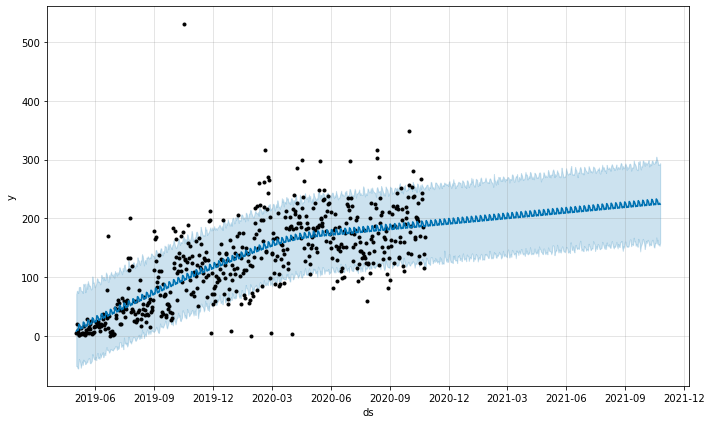

In [ ]:
m.plot(forecast);

In [ ]:
# sidetrack - what story was that outlier with 500+ views?
df.loc[df.y>500]  # doesn't look like anything was written that day.. odd..

,ds,y
167,2019-10-17,531


- Black dots: actual values
- Blue lines: upper, actual (dark blue), lower windows for yhat
- Blue blob: prediction window (yhat window)

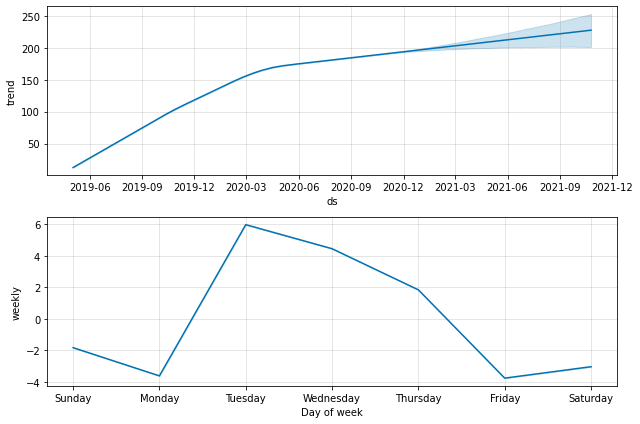

In [ ]:
m.plot_components(forecast);

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

Step 6: model evaluation

https://facebook.github.io/prophet/docs/diagnostics.html

- initial: how much data to consider before making any predictions
    - e.g. 10 years = `'3650 days'`
- period: how frequently to make predictions 
    - e.g. every 6 months = `'180 days'`
    - should be about 1/2 of your `horizon`
- horizon: how many periods to predict
    - e.g. 1 year = `'365 days'`
    - should be about 2x your `period`

In [ ]:
from fbprophet.diagnostics import cross_validation

cross_validation(m, initial='90 days', period='90 days', horizon='180 days')

INFO:fbprophet:Making 4 forecasts with cutoffs between 2019-08-02 00:00:00 and 2020-04-28 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-08-03,63.922390,30.136508,100.699311,60,2019-08-02
1,2019-08-04,67.845408,31.932380,103.356646,24,2019-08-02
2,2019-08-05,68.614533,28.041012,105.195811,30,2019-08-02
3,2019-08-06,72.537509,36.356263,108.084955,28,2019-08-02
4,2019-08-07,66.152638,29.807034,101.755070,41,2019-08-02
...,...,...,...,...,...,...
715,2020-10-21,271.282298,212.765230,342.063684,243,2020-04-28
716,2020-10-22,275.152552,214.996266,339.654313,185,2020-04-28
717,2020-10-23,266.195236,201.818098,329.836203,116,2020-04-28
718,2020-10-24,264.622471,204.977263,333.130201,139,2020-04-28


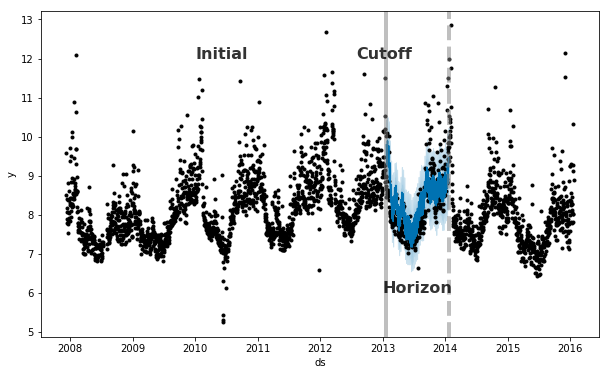

In [ ]:
df_cv = cross_validation(m, initial='90 days', period='90 days', horizon='180 days')

df_cv['cutoff'].value_counts()

INFO:fbprophet:Making 4 forecasts with cutoffs between 2019-08-02 00:00:00 and 2020-04-28 00:00:00


2020-04-28    180
2020-01-29    180
2019-10-31    180
2019-08-02    180
Name: cutoff, dtype: int64

In [ ]:
df_cv['cutoff'].unique()

array(['2019-08-02T00:00:00.000000000', '2019-10-31T00:00:00.000000000',
       '2020-01-29T00:00:00.000000000', '2020-04-28T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
df.ds.head(1)

0    2019-05-03
Name: ds, dtype: object

2019-05-03 + 90 days (our `initial`) is about 2019-08-03 (aka 2019-08-02)

2019-08-03 + 90 days days (our `period`) is about 2019-11-03 (aka 2019-10-31)

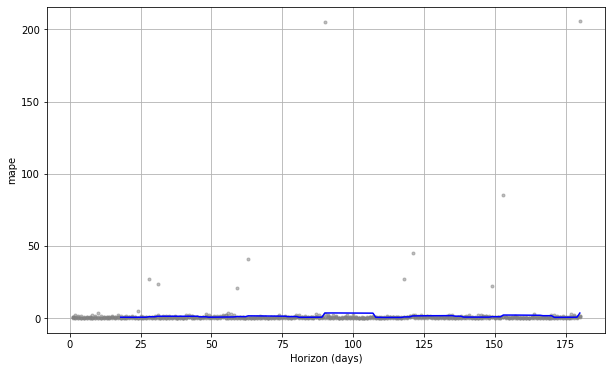

In [ ]:
from fbprophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='mape')

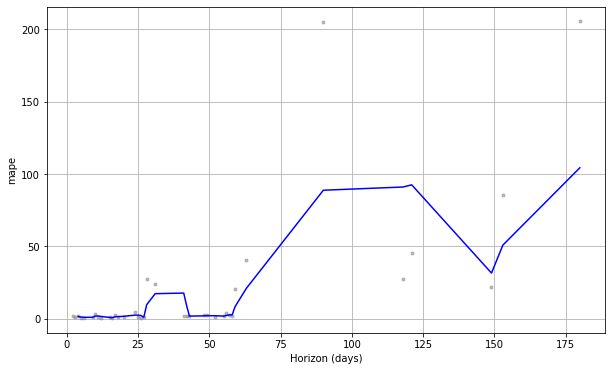

In [ ]:
plot_cross_validation_metric(df_cv.loc[df_cv['y']<50], metric='mape');

### Switching to $F stock data

In [ ]:
df = pd.read_csv('https://github.com/gumdropsteve/datasets/raw/master/stocks/F.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-11-17,16.76,16.900000,16.520000,16.680000,11.256759,127748600
1,2010-11-18,16.77,16.870001,16.049999,16.120001,10.878832,256937900
2,2010-11-19,16.02,16.379999,15.830000,16.280001,10.986811,130323600
3,2010-11-22,16.26,16.540001,16.110001,16.200001,10.932823,91288900
4,2010-11-23,16.01,16.160000,15.620000,15.700000,10.595387,96689100
...,...,...,...,...,...,...,...
2512,2020-11-10,8.23,8.590000,8.180000,8.380000,8.380000,87468400
2513,2020-11-11,8.60,8.600000,8.290000,8.330000,8.330000,75644400
2514,2020-11-12,8.26,8.290000,8.100000,8.210000,8.210000,81064900
2515,2020-11-13,8.23,8.570000,8.230000,8.540000,8.540000,79475100


Prep data for Prophet...

In [ ]:
df = df[['Date', 'Adj Close']]

df.columns = ['ds', 'y']

df

,ds,y
0,2010-11-17,11.256759
1,2010-11-18,10.878832
2,2010-11-19,10.986811
3,2010-11-22,10.932823
4,2010-11-23,10.595387
...,...,...
2512,2020-11-10,8.380000
2513,2020-11-11,8.330000
2514,2020-11-12,8.210000
2515,2020-11-13,8.540000


In [ ]:
from fbprophet import Prophet

m = Prophet()

In [ ]:
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
f = m.make_future_dataframe(365*5)

f

,ds
0,2010-11-17
1,2010-11-18
2,2010-11-19
3,2010-11-22
4,2010-11-23
...,...
4337,2025-11-11
4338,2025-11-12
4339,2025-11-13
4340,2025-11-14


In [ ]:
m.predict(f)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-11-17,11.509010,10.609852,12.570969,11.509010,11.509010,0.048827,0.048827,0.048827,0.067728,0.067728,0.067728,-0.018901,-0.018901,-0.018901,0.0,0.0,0.0,11.557837
1,2010-11-18,11.497526,10.497793,12.522909,11.497526,11.497526,0.043975,0.043975,0.043975,0.064002,0.064002,0.064002,-0.020027,-0.020027,-0.020027,0.0,0.0,0.0,11.541501
2,2010-11-19,11.486043,10.514253,12.534200,11.486043,11.486043,0.036466,0.036466,0.036466,0.055388,0.055388,0.055388,-0.018922,-0.018922,-0.018922,0.0,0.0,0.0,11.522508
3,2010-11-22,11.451592,10.537161,12.526697,11.451592,11.451592,0.058655,0.058655,0.058655,0.062383,0.062383,0.062383,-0.003729,-0.003729,-0.003729,0.0,0.0,0.0,11.510246
4,2010-11-23,11.440108,10.498386,12.521427,11.440108,11.440108,0.081755,0.081755,0.081755,0.077239,0.077239,0.077239,0.004515,0.004515,0.004515,0.0,0.0,0.0,11.521863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,2025-11-11,1.127912,-9.425189,11.814228,-9.630977,12.094336,0.106986,0.106986,0.106986,0.077239,0.077239,0.077239,0.029747,0.029747,0.029747,0.0,0.0,0.0,1.234898
4338,2025-11-12,1.124879,-9.590616,12.179031,-9.646509,12.095692,0.084462,0.084462,0.084462,0.067728,0.067728,0.067728,0.016734,0.016734,0.016734,0.0,0.0,0.0,1.209341
4339,2025-11-13,1.121845,-9.468560,12.048153,-9.657443,12.097048,0.069378,0.069378,0.069378,0.064002,0.064002,0.064002,0.005376,0.005376,0.005376,0.0,0.0,0.0,1.191223
4340,2025-11-14,1.118812,-9.759316,12.028064,-9.668730,12.098404,0.051312,0.051312,0.051312,0.055388,0.055388,0.055388,-0.004076,-0.004076,-0.004076,0.0,0.0,0.0,1.170124


But how did we do??

In [ ]:
# what should my initial be?? when does our data start?
df.ds.head(1)

0    2010-11-17
Name: ds, dtype: object

In [ ]:
365*5  # let's give it 5 years to start

1825

In [ ]:
%%time
df_cv = cross_validation(m, 
                         initial='1825 days',  # 5 years to start 
                         period='180 days',  # then make a prediction every 6 months 
                         horizon='365 days'  # predict a whole year each prediction
                         )

df_cv

INFO:fbprophet:Making 9 forecasts with cutoffs between 2015-12-08 00:00:00 and 2019-11-17 00:00:00



CPU times: user 33.3 s, sys: 434 ms, total: 33.8 s
Wall time: 34.2 s


Nore: you can run cross_validation in parallel to speed it up!!

https://facebook.github.io/prophet/docs/diagnostics.html#parallelizing-cross-validation

Note: this doesn't really work in colab, try downloading and running local :)

In [ ]:
# %%time
# df_cv = cross_validation(m, 
#                          initial='1825 days',  # 5 years to start 
#                          period='180 days',  # then make a prediction every 6 months 
#                          horizon='365 days',  # predict a whole year each prediction
#                          parallel="process"  # run in parallel (make it faster)
#                          )

# df_cv

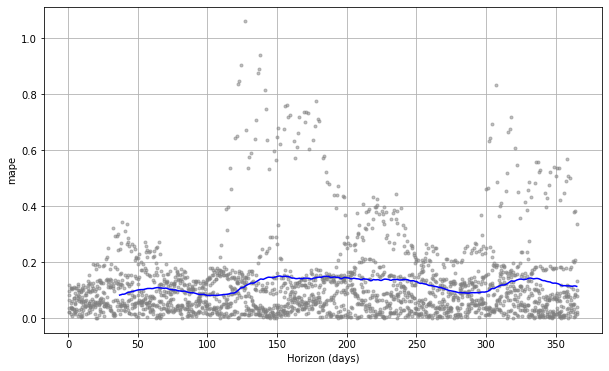

In [ ]:
plot_cross_validation_metric(df_cv, metric='mape');